In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')
from joblib import dump #Save

---
## Integer 인코딩

In [50]:
data = pd.read_csv('../dataset/app_int.csv')

In [51]:
data.columns

Index(['Unnamed: 0', 'Available_Age', 'Size', 'Price', 'Free', 'Rating',
       'Reviews', 'Cate_Int'],
      dtype='object')

### 데이터 살펴보기

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546056 entries, 0 to 546055
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     546056 non-null  int64  
 1   Available_Age  546056 non-null  int64  
 2   Size           546056 non-null  int64  
 3   Price          546056 non-null  int64  
 4   Free           546056 non-null  bool   
 5   Rating         546056 non-null  float64
 6   Reviews        546056 non-null  int64  
 7   Cate_Int       546056 non-null  int64  
dtypes: bool(1), float64(1), int64(6)
memory usage: 29.7 MB


In [53]:
data.duplicated().any() # 중복없음.

False

In [54]:
data['Rating'].value_counts() # 데이터가 0, 5점에 많이 몰려있음.

Rating
5.00    184321
1.00     34169
3.00     27035
4.00     24609
4.50     10849
         ...  
1.06         9
1.04         9
1.05         7
1.03         2
1.02         1
Name: count, Length: 400, dtype: int64

In [55]:
# data.drop(['Unnamed: 0','Category_0','Category_1','Category_2','Category_3','Category_4'], axis=1).boxplot()
# # 1.Reviews 2.Size 3.Price 순으로 수치의 차이가 크다.

In [56]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# # 리뷰수
# axes[0].pie(data['Reviews'], labels=data['Reviews'].index, autopct='%1.1f%%', startangle=90)
# axes[0].set_title('리뷰수')
# # 파일크기
# axes[1].pie(data['Size'], labels=data['Size'].index, autopct='%1.1f%%', startangle=90)
# axes[1].set_title('파일크기(MB)')
# # 가격
# axes[2].pie(data['Price'], labels=data['Price'].index, autopct='%1.1f%%', startangle=90)
# axes[2].set_title('가격')

# plt.tight_layout()
# plt.show()

- Rating 0점,5점 등에 편향
- Reveiws, Size, Price 순으로 편향되어 있음.

In [57]:
X = data.drop(['Rating','Unnamed: 0'], axis=1)
y = data['Rating']

In [58]:
X,y

(        Available_Age  Size  Price   Free  Reviews  Cate_Int
 0                   1    13      0   True        1         1
 1                   4    25      0   True     1285         1
 2                   4    60      0   True     1839         1
 3                   1     3      2  False      242         4
 4                   4     2      1  False       21         1
 ...               ...   ...    ...    ...      ...       ...
 546051              1    39      0   True        1        12
 546052              1    92      0   True        7        12
 546053              1    16      0   True      143        12
 546054              1    37      0   True     1500        12
 546055              1    16      0   True        1        12
 
 [546056 rows x 6 columns],
 0         5.00
 1         4.78
 2         4.79
 3         4.67
 4         3.10
           ... 
 546051    5.00
 546052    4.43
 546053    3.92
 546054    4.83
 546055    4.00
 Name: Rating, Length: 546056, dtype: float64)

In [59]:
std_scaler = StandardScaler().fit_transform(X)
minmax_scaler = MinMaxScaler().fit_transform(X)
robust_scaler = RobustScaler().fit_transform(X)

std_scaled_df = pd.DataFrame(std_scaler, columns=X.columns)
minmax_scaled_df = pd.DataFrame(minmax_scaler, columns=X.columns)
robust_scaled_df = pd.DataFrame(robust_scaler, columns=X.columns)

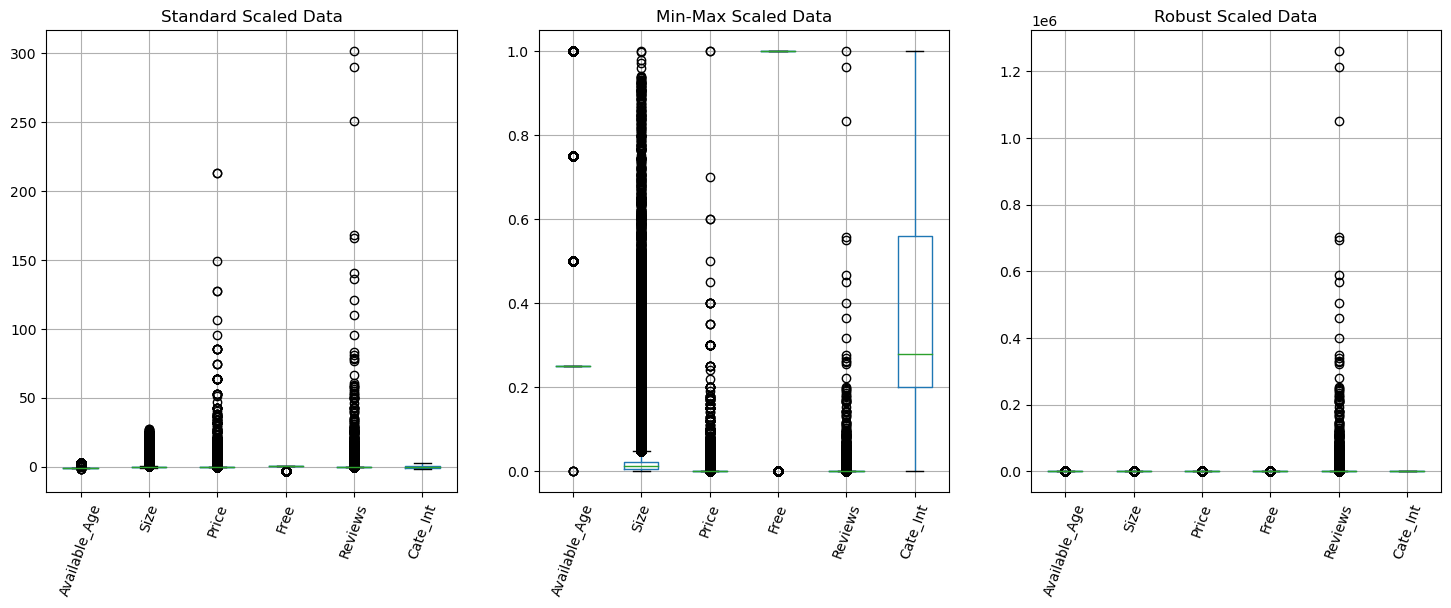

In [60]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Standard Scaled Data')
std_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.subplot(1, 3, 2)
plt.title('Min-Max Scaled Data')
minmax_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.subplot(1, 3, 3)
plt.title('Robust Scaled Data')
robust_scaled_df.boxplot()
plt.xticks(rotation=70)


plt.show()

In [61]:
robust_scaled_df
robust_scaled_df.columns

Index(['Available_Age', 'Size', 'Price', 'Free', 'Reviews', 'Cate_Int'], dtype='object')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(robust_scaled_df, y,
                                                    test_size=0.2,
                                                    random_state=13
                                                    )

In [63]:
# 모델 준비
LR_model = LinearRegression()
# SVR_model = SVR(kernel='linear', C=1, epsilon=0.1) # param조정
RFR_model = RandomForestRegressor()
DTR_model = DecisionTreeRegressor()
GBR_model = GradientBoostingRegressor()

In [64]:
# 피팅
LR_model.fit(X_train, y_train)

LinearRegression()

In [65]:
# SVR_model.fit(X_train, y_train)

In [66]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [68]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [69]:
# 예측
y_pred_lr = LR_model.predict(X_test)
y_pred_rfr = RFR_model.predict(X_test)
y_pred_dtr = DTR_model.predict(X_test)
y_pred_gbr = GBR_model.predict(X_test)
# y_pred_svr = SVR_model.predict(X_test)

In [70]:
# Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"RMSE : {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"MSE : {mse_lr:.4f}")

RMSE : 1.1919
MAE : 0.9539
MSE : 1.4206


In [71]:
# RandomForest
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print(f"RMSE : {rmse_rfr:.4f}")
print(f"MAE : {mae_rfr:.4f}")
print(f"MSE : {mse_rfr:.4f}")

RMSE : 1.2288
MAE : 0.9336
MSE : 1.5100


In [72]:
# DecisionTreeRegression
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print(f"RMSE : {rmse_dtr:.4f}")
print(f"MAE : {mae_dtr:.4f}")
print(f"MSE : {mse_dtr:.4f}")

RMSE : 1.3447
MAE : 1.0036
MSE : 1.8082


In [73]:
# Gradient Boosting Regression
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f"RMSE : {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"MSE : {mse_gbr:.4f}")

RMSE : 1.1648
MAE : 0.9167
MSE : 1.3567


In [74]:
metrics = {
    'Linear Reg': {'MAE': mae_lr, 'RMSE':rmse_lr,'MSE':mse_lr},
    'Random Forest Reg': {'MAE': mae_rfr, 'RMSE': rmse_rfr,'MSE':mse_rfr},
    'Decision Tree Reg': {'MAE': mae_dtr, 'RMSE': rmse_dtr,'MSE':mse_dtr},
    'Gradient Boosting Reg': {'MAE': mae_gbr, 'RMSE': rmse_gbr,'MSE':mse_gbr}
}
result = pd.DataFrame(metrics).round(3).T
result
    

,MAE,RMSE,MSE
Linear Reg,0.954,1.192,1.421
Random Forest Reg,0.934,1.229,1.510
Decision Tree Reg,1.004,1.345,1.808
Gradient Boosting Reg,0.917,1.165,1.357


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


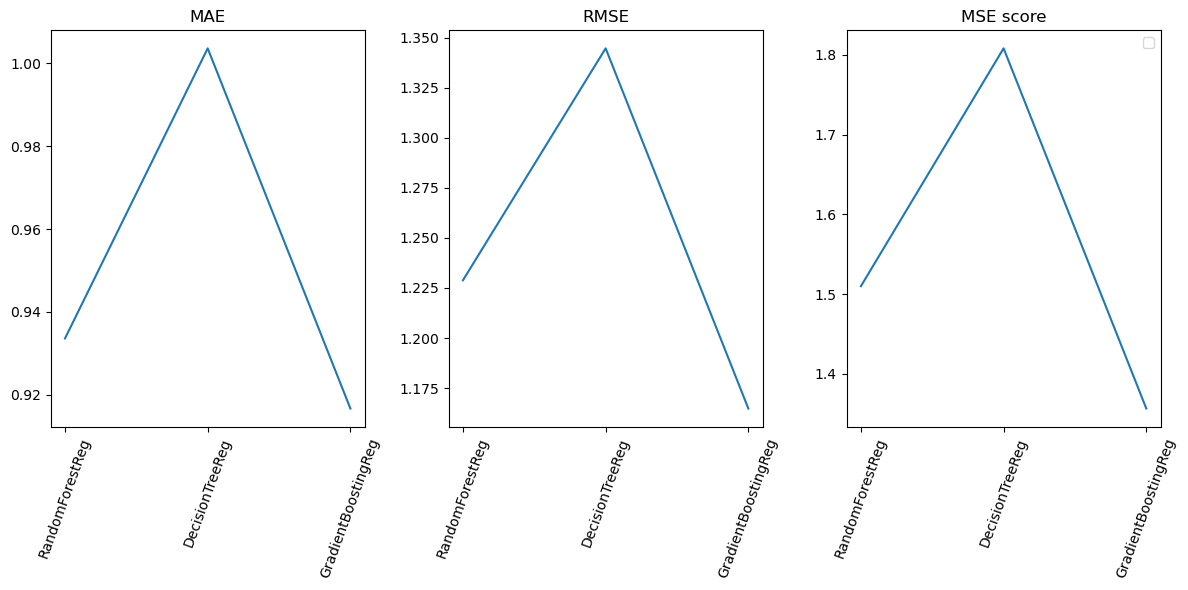

In [75]:
model = ['RandomForestReg','DecisionTreeReg', 'GradientBoostingReg']
mae = [mae_rfr,mae_dtr,mae_gbr]
rmse = [rmse_rfr,rmse_dtr,rmse_gbr]
mse = [mse_rfr,mse_dtr,mse_gbr]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(model,mae)
plt.title('MAE')
plt.xticks(rotation=70)

plt.subplot(1,3,2)
plt.plot(model,rmse)
plt.title('RMSE')
plt.xticks(rotation=70)

plt.subplot(1,3,3)
plt.plot(model, mse)
plt.title('MSE score')
plt.xticks(rotation=70)
plt.tight_layout()
plt.legend()
plt.show()

In [76]:
# 교차 검증 
kf = KFold(n_splits=5)
total = 0

for train, valid in kf.split(X):
    X_train, X_valid = X.iloc[train], X.iloc[valid]
    y_train, y_vaild = y.iloc[train], y.iloc[valid]

    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    rmse = mean_squared_error(y_vaild, y_pred, squared=False)
    mae = mean_absolute_error(y_vaild, y_pred)
    mse = mean_squared_error(y_vaild, y_pred)
    total += rmse
    print(f'RMSE : {rmse:.3f}  ', end='')
    print(f'MAE : {mae:.3f}  ', end='')
    print(f'MSE : {mse:.3f}')

print(f'MSE Avg : {total/5}')

RMSE : 1.179  MAE : 0.935  MSE : 1.389
RMSE : 1.157  MAE : 0.910  MSE : 1.339
RMSE : 1.114  MAE : 0.873  MSE : 1.241
RMSE : 1.139  MAE : 0.903  MSE : 1.298
RMSE : 1.227  MAE : 0.975  MSE : 1.505
MSE Avg : 1.1631601241152558


In [77]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators' : [200,300,400],
#     'max_depth' : [4,5,6]
# }

# gridserch = GridSearchCV(estimator=GBR_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# gridserch.fit(X_train, y_train)

In [78]:
# print(gridserch.best_params_)
# print(gridserch.best_score_)
# print(gridserch.best_estimator_)

In [79]:
# model_tuned = GradientBoostingRegressor(n_estimators=200, max_depth=6)
# model_tuned.fit(X_train, y_train)

In [80]:
# y_pred_tuned = model_tuned.predict(X_test)

# mse_tuned = mean_squared_error(y_test, y_pred_tuned)
# mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
# print(f'Tuned MSE : {mse_tuned}')
# print(f'Tuned MAE : {mae_tuned}')

In [81]:
# result = {
#     'GBR_before': {'MSE': mse_gbr, 'MAE': mae_gbr},
#     'GBR_tuned': {'MSE': mse_tuned, 'MAE': mae_tuned}
# }
# res = pd.DataFrame(result).round(3)
# res

### 모델의 복잡도를 높이면 모델이 이상치를 더 잘 학습하게되어 과적합이 일어날 수 있다.
- train data를 더 만들거나 regularization을 적용하거나, 모델의 구조를 단순화하여 복잡도를 더 낮출 수 있다.
- feature을 조정하는 것도 방법이다. (Category out?)

---

## HyperOpt 써보기

In [82]:
# !pip install hyperopt

In [83]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score, train_test_split


space = {
    'n_estimators': hp.choice('n_estimators', range(100, 500)),
    'max_depth': hp.choice('max_depth', range(3, 6)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 0.5),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.07),
    'loss': hp.choice('loss', ['huber', 'absolute_error'])
}


In [84]:
X_train, X_test, y_train, y_test = train_test_split(robust_scaled_df,y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [85]:
# 목적 함수 정의
def objective(params):
    regressor = GradientBoostingRegressor(**params)
    # 교차 검증을 사용하여 모델 평가 (MSE 사용)
    score = -cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error').mean()
    return {'loss': score, 'status': STATUS_OK}

In [86]:
# 최적화 실행
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

In [ ]:
# 최적화된 모델 훈련 및 평가
best_regressor = GradientBoostingRegressor(**best_params)
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
test_score = best_regressor.score(X_test, y_test)

In [ ]:
# 결과 출력
print("최적의 하이퍼파라미터:", best_params)
print("테스트 세트에서의 점수:", test_score)
print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'MAPE : {mape}')

---

In [ ]:
# from bokeh.plotting import figure, show

# fruits = ['Apples', 'Pears', 'Kiwis', 'Plums', 'Bananas', 'Strawberries']
# counts = [5,3,6,2,7,10]

# # Sort Values
# sorted_fruits = sorted(fruits, key=lambda x: counts[fruits.index(x)])

# p = figure(x_range=sorted_fruits, height=250, title="Counting Fruits", toolbar_location=None, tools="")

# p.vbar(x=fruits, top=counts, width=0.95)
# p.y_range.start = 0
# p.xgrid.grid_line_color=None
# show(p)